# Setup

In [1]:
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)


# Get the data

In [2]:
noise_df = pd.read_csv("noise.csv")
noise_df.head()

,Start date/time in UTC,Timezone,Duration (s),Observer ID,Latitude,Longitude,Mean volume (dBA),Mood,Could control noise exposure,Indoors,Emoji,Emoji descriptions,Nominated as noise refuge
0,2022-02-08 19:07:20,America/New_York,29,56,42.71516,-76.40451,42,2,False,True,🗣🤣,"speaking head in silhouette,rolling on the flo...",False
1,2022-02-08 19:56:00,America/New_York,29,54,42.71489,-76.40509,39,1,True,True,🎶,multiple musical notes,False
2,2022-02-08 20:46:02,America/New_York,29,55,42.38951,-71.14181,70,3,False,False,🚗🛣,"automobile,motorway",False
3,2022-02-09 15:17:05,America/New_York,29,61,41.82063,-71.42895,72,1,True,True,🎶🎻🎺,"multiple musical notes,violin,trumpet",False
4,2022-02-09 16:07:23,America/New_York,29,64,42.47998,-76.45123,39,2,False,True,NaN,NaN,False


# EDA

In [3]:
# Find the total number of rows

noise_df.shape

(2446, 13)

In [5]:
# Check the missing values
noise_df.isna().sum()

Start date/time in UTC             0
Timezone                           0
Duration (s)                       0
Observer ID                        0
Latitude                           0
Longitude                          0
Mean volume (dBA)                  0
Mood                               0
Could control noise exposure       0
Indoors                            0
Emoji                           1267
Emoji descriptions              1286
Nominated as noise refuge        799
dtype: int64

In [6]:
noise_df.info

<bound method DataFrame.info of      Start date/time in UTC          Timezone  Duration (s)  Observer ID  \
0       2022-02-08 19:07:20  America/New_York            29           56   
1       2022-02-08 19:56:00  America/New_York            29           54   
2       2022-02-08 20:46:02  America/New_York            29           55   
3       2022-02-09 15:17:05  America/New_York            29           61   
4       2022-02-09 16:07:23  America/New_York            29           64   
...                     ...               ...           ...          ...   
2441    2024-04-14 16:01:19      America/Lima            29         1779   
2442    2024-04-14 16:21:29      America/Lima            29         1779   
2443    2024-04-14 16:40:06      America/Lima            29         1779   
2444    2024-04-15 23:27:42  America/New_York            29         1782   
2445    2024-04-16 02:35:19  America/New_York            29         1782   

      Latitude  Longitude  Mean volume (dBA)  Mood  \
0

## Correlation PLot

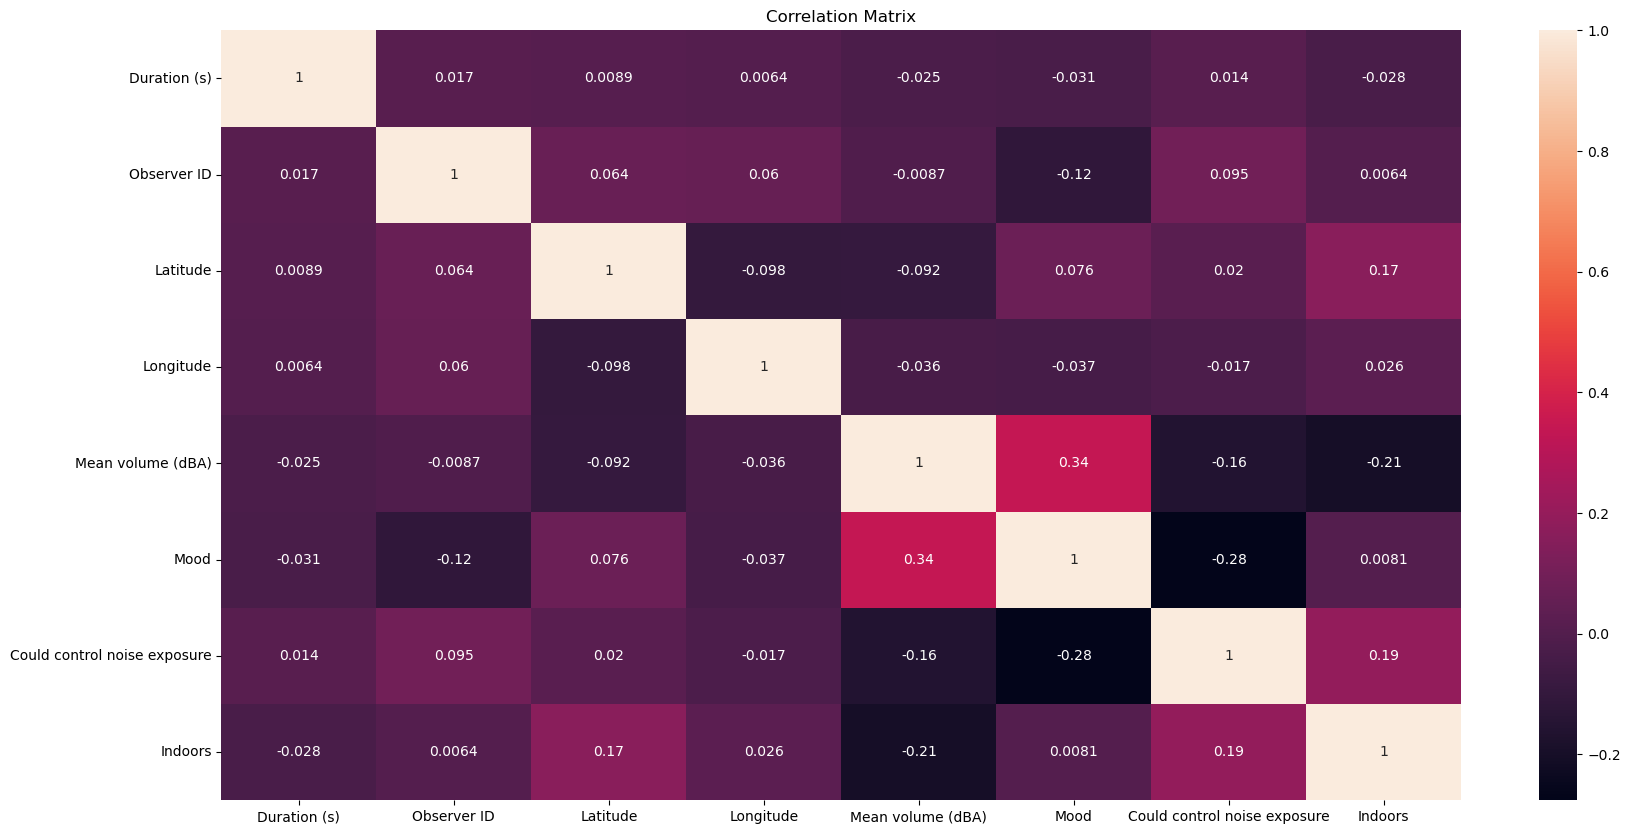

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(noise_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Dropping columns which we dont want to use
### Iam dropping Timezone, Start date/time in UTC
### Emojis column have many missing values and Iam dropping these two columns too.

In [8]:
noise_df=noise_df.drop(['Emoji','Emoji descriptions','Start date/time in UTC', 'Timezone','Observer ID'],axis=1)

In [9]:
noise_df.head()

,Duration (s),Latitude,Longitude,Mean volume (dBA),Mood,Could control noise exposure,Indoors,Nominated as noise refuge
0,29,42.71516,-76.40451,42,2,False,True,False
1,29,42.71489,-76.40509,39,1,True,True,False
2,29,42.38951,-71.14181,70,3,False,False,False
3,29,41.82063,-71.42895,72,1,True,True,False
4,29,42.47998,-76.45123,39,2,False,True,False


In [10]:
noise_df.isna().sum()

Duration (s)                      0
Latitude                          0
Longitude                         0
Mean volume (dBA)                 0
Mood                              0
Could control noise exposure      0
Indoors                           0
Nominated as noise refuge       799
dtype: int64

## Imputing the target variable with the most frequent value as this is a binary variable

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data
imputer.fit(noise_df)

# Transform the data
noise_df = pd.DataFrame(imputer.transform(noise_df), columns=noise_df.columns)

In [12]:
noise_df[['Nominated as noise refuge','Could control noise exposure','Indoors']] = noise_df[['Nominated as noise refuge','Could control noise exposure','Indoors']].astype(int)

# Display the modified DataFrame
print(noise_df)

     Duration (s)  Latitude Longitude Mean volume (dBA) Mood  \
0              29  42.71516 -76.40451                42    2   
1              29  42.71489 -76.40509                39    1   
2              29  42.38951 -71.14181                70    3   
3              29  41.82063 -71.42895                72    1   
4              29  42.47998 -76.45123                39    2   
...           ...       ...       ...               ...  ...   
2441           29 -12.10238 -76.99052                77    3   
2442           29 -12.10075 -76.98943                74    3   
2443           29 -12.09712 -76.98891                74    3   
2444           29  35.20294 -80.59903                40    1   
2445           29  35.20294 -80.59895                43    1   

      Could control noise exposure  Indoors  Nominated as noise refuge  
0                                0        1                          0  
1                                1        1                          0  
2           

### Here we changed the binary variables into ineteger for our analysis

In [13]:
noise_df.isna().sum()

Duration (s)                    0
Latitude                        0
Longitude                       0
Mean volume (dBA)               0
Mood                            0
Could control noise exposure    0
Indoors                         0
Nominated as noise refuge       0
dtype: int64

### The target column is imputed and the now there are no missing values in the data frame

In [14]:
noise_df.describe

<bound method NDFrame.describe of      Duration (s)  Latitude Longitude Mean volume (dBA) Mood  \
0              29  42.71516 -76.40451                42    2   
1              29  42.71489 -76.40509                39    1   
2              29  42.38951 -71.14181                70    3   
3              29  41.82063 -71.42895                72    1   
4              29  42.47998 -76.45123                39    2   
...           ...       ...       ...               ...  ...   
2441           29 -12.10238 -76.99052                77    3   
2442           29 -12.10075 -76.98943                74    3   
2443           29 -12.09712 -76.98891                74    3   
2444           29  35.20294 -80.59903                40    1   
2445           29  35.20294 -80.59895                43    1   

      Could control noise exposure  Indoors  Nominated as noise refuge  
0                                0        1                          0  
1                                1        1        

In [15]:
noise_df.shape

(2446, 8)

In [16]:
noise_df['Nominated as noise refuge'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Nominated as noise refuge, dtype: int32

## Plotting the data points on the map to know from  which location the data is recorded

C:\Users\Vikranth's PC\AppData\Local\Temp\ipykernel_8600\4200411726.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

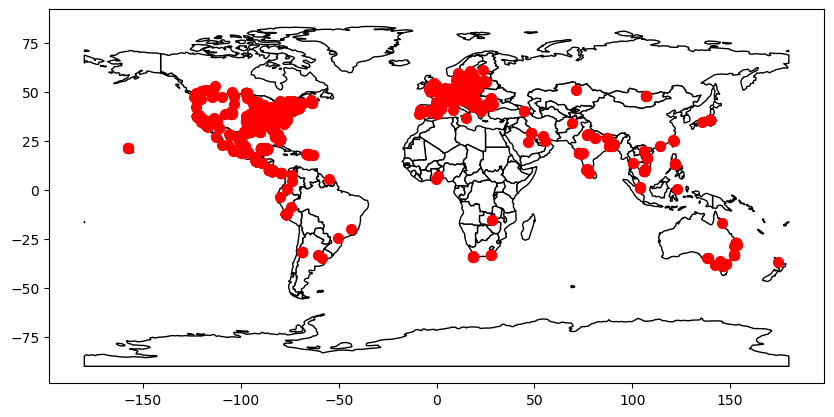

In [17]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming your DataFrame is named noise_df
# Convert latitude and longitude to Points
geometry = [Point(xy) for xy in zip(noise_df['Longitude'], noise_df['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(noise_df, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=50)


## Plotting the noise severity on the map 

C:\Users\Vikranth's PC\AppData\Local\Temp\ipykernel_8600\1564965521.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\anaconda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


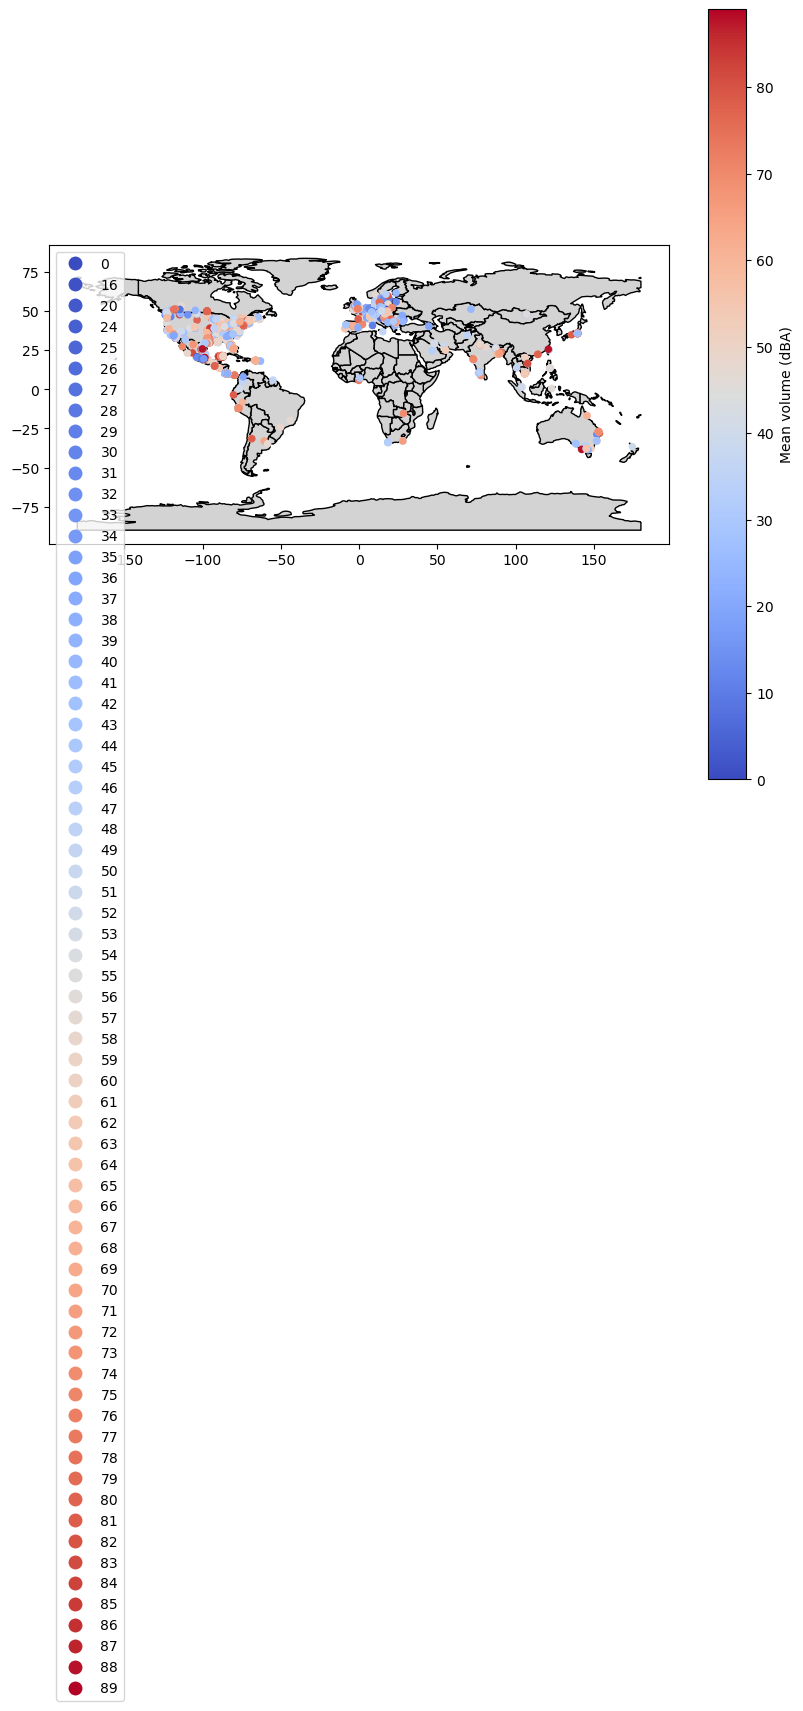

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming your DataFrame is named noise_df
# Convert latitude and longitude to Points
geometry = [Point(xy) for xy in zip(noise_df['Longitude'], noise_df['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(noise_df, geometry=geometry)

# Plot the colored map
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Define colormap
cmap = 'coolwarm'

# Plot GeoDataFrame with colors based on "Mean volume (dBA)" column
gdf.plot(ax=ax, marker='o', column='Mean volume (dBA)', cmap=cmap, markersize=20, legend=True)

# Add legend
vmin, vmax = gdf['Mean volume (dBA)'].min(), gdf['Mean volume (dBA)'].max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Mean volume (dBA)')

plt.show()


In [19]:
noise_df.dtypes

Duration (s)                    object
Latitude                        object
Longitude                       object
Mean volume (dBA)               object
Mood                            object
Could control noise exposure     int32
Indoors                          int32
Nominated as noise refuge        int32
dtype: object

In [20]:
noise_df.describe()

,Could control noise exposure,Indoors,Nominated as noise refuge
count,2446.000000,2446.000000,2446.000000
mean,0.297220,0.400654,0.114473
std,0.457128,0.490131,0.318450
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


## Separate the POTENTIAL target column. Separate numerical and binary inputs¶

In [21]:
target = noise_df['Nominated as noise refuge']

numeric_columns = noise_df[['Latitude', 'Longitude', 'Duration (s)', 
                   'Mean volume (dBA)', 'Mood']]

binary_columns = noise_df[['Could control noise exposure', 'Indoors']]


In [22]:
numeric_columns.head()

,Latitude,Longitude,Duration (s),Mean volume (dBA),Mood
0,42.71516,-76.40451,29,42,2
1,42.71489,-76.40509,29,39,1
2,42.38951,-71.14181,29,70,3
3,41.82063,-71.42895,29,72,1
4,42.47998,-76.45123,29,39,2


In [23]:
binary_columns.head()

,Could control noise exposure,Indoors
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1


In [24]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Nominated as noise refuge, dtype: int32

## Standard Scaling 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns_std = scaler.fit_transform(numeric_columns)

numeric_columns_std

array([[ 0.62085571, -0.27692106,  0.11661768, -1.34399112, -0.73019234],
       [ 0.62084084, -0.2769306 ,  0.11661768, -1.56733526, -1.5628499 ],
       [ 0.60291251, -0.1903508 ,  0.11661768,  0.74055411,  0.10246522],
       ...,
       [-2.39928272, -0.28653431,  0.11661768,  1.03834629,  0.10246522],
       [ 0.20693489, -0.34591999,  0.11661768, -1.49288721, -1.5628499 ],
       [ 0.20693489, -0.34591867,  0.11661768, -1.26954308, -1.5628499 ]])

In [26]:
numeric_columns_std_df = pd.DataFrame(numeric_columns_std, 
                                      columns=numeric_columns.columns).reset_index(drop=True)

numeric_columns_std_df.head()

,Latitude,Longitude,Duration (s),Mean volume (dBA),Mood
0,0.620856,-0.276921,0.116618,-1.343991,-0.730192
1,0.620841,-0.276931,0.116618,-1.567335,-1.562850
2,0.602913,-0.190351,0.116618,0.740554,0.102465
3,0.571567,-0.195074,0.116618,0.889450,-1.562850
4,0.607897,-0.277690,0.116618,-1.567335,-0.730192


In [28]:
x = pd.concat((numeric_columns_std_df.reset_index(drop=True), 
                             binary_columns.reset_index(drop=True)), axis=1)

# if you want to create a separate column for missing values, use dummy_na=True:
# pd.get_dummies(df,dummy_na=True)

x.shape

(2446, 7)

In [29]:
x.head()

,Latitude,Longitude,Duration (s),Mean volume (dBA),Mood,Could control noise exposure,Indoors
0,0.620856,-0.276921,0.116618,-1.343991,-0.730192,0,1
1,0.620841,-0.276931,0.116618,-1.567335,-1.562850,1,1
2,0.602913,-0.190351,0.116618,0.740554,0.102465,0,0
3,0.571567,-0.195074,0.116618,0.889450,-1.562850,1,1
4,0.607897,-0.277690,0.116618,-1.567335,-0.730192,0,1


In [30]:
y=target

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Nominated as noise refuge, dtype: int32

### Train Test Split of Data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [34]:
x_train.shape

(1712, 7)

In [35]:
x_test.shape

(734, 7)

In [36]:
y_train.shape

(1712,)

In [37]:
y_test.shape

(734,)

# Baseline Model

In [38]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
#Baseline Train Accuracy
dummy_train_pred = dummy_clf.predict(x_train)

baseline_train_acc = accuracy_score(y_train, dummy_train_pred)

print('Baseline Train Accuracy: {}' .format(baseline_train_acc))

Baseline Train Accuracy: 0.8837616822429907


In [41]:
#Baseline Test Accuracy
dummy_test_pred = dummy_clf.predict(x_test)

baseline_test_acc = accuracy_score(y_test, dummy_test_pred)

print('Baseline Test Accuracy: {}' .format(baseline_test_acc))

Baseline Test Accuracy: 0.8896457765667575


### The dummy classifier gives us the baseline accuracy of train and test which will be our minimum bench mark for future models

# Logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty=None)

log_reg.fit(x_train, y_train)

LogisticRegression(penalty=None)

In [43]:
#Predict the train values
train_y_pred = log_reg.predict(x_train)

#Train accuracy
accuracy_score(y_train, train_y_pred)

0.8837616822429907

In [44]:
#Predict the test values
test_y_pred = log_reg.predict(x_test)

#Test accuracy
accuracy_score(y_test, test_y_pred)

0.888283378746594

In [45]:
from sklearn.metrics import confusion_matrix

#We usually create the confusion matrix on test set
confusion_matrix(y_test, test_y_pred)

array([[652,   1],
       [ 81,   0]], dtype=int64)

### Here we got almost the same accuracy of baseline model and there is no much improvement in model accuracy and there is no overfitting 

# SVM model

In [46]:
from sklearn.svm import SVC
 
lin_svm = SVC(kernel="linear")

lin_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [47]:
#Predict the train values
train_y_pred = lin_svm.predict(x_train)

#Train accuracy
accuracy_score(y_train, train_y_pred)

0.8837616822429907

In [48]:
#Predict the test values
test_y_pred = lin_svm.predict(x_test)

#Test accuracy
accuracy_score(y_test, test_y_pred)

0.8896457765667575

### Here we got almost the same accuracy and there is no much improvement in model accuracy and there is no overfitting

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier 

tree_clf = DecisionTreeClassifier(max_depth=5)

tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
#Train accuracy:
train_y_pred = tree_clf.predict(x_train)

print(accuracy_score(y_train, train_y_pred))

0.9012850467289719


In [51]:
#Test accuracy:
test_y_pred = tree_clf.predict(x_test)

print(accuracy_score(y_test, test_y_pred))

0.8910081743869209


# Decision Tree with more regularization 

In [52]:
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 10, max_depth=15)

tree_clf2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10)

In [53]:
#Train accuracy:
train_y_pred = tree_clf2.predict(x_train)

print(accuracy_score(y_train, train_y_pred))

0.9059579439252337


In [54]:
#Test accuracy:
test_y_pred = tree_clf2.predict(x_test)

print(accuracy_score(y_test, test_y_pred))

0.8923705722070845


### Here we can see slight improvement in test accuracy and this model is performing better than other models

# Randomized Grid Search

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {'max_depth': randint(low=1, high=20), 
              'min_samples_leaf': randint(low=1, high=20)}

tree_gs = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, 
                             n_iter=15, cv=5, verbose=1,
                             scoring='accuracy',
                             return_train_score=True)

tree_gs.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E025035DF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E023120E50>},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [56]:
cvres = tree_gs.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.876751402315312 {'max_depth': 15, 'min_samples_leaf': 11}
0.8679931120317802 {'max_depth': 8, 'min_samples_leaf': 7}
0.8773361976369495 {'max_depth': 19, 'min_samples_leaf': 11}
0.8609721582868737 {'max_depth': 11, 'min_samples_leaf': 4}
0.8557311646463097 {'max_depth': 8, 'min_samples_leaf': 3}
0.883177331082809 {'max_depth': 2, 'min_samples_leaf': 12}
0.8685744974681603 {'max_depth': 6, 'min_samples_leaf': 2}
0.8837621264044465 {'max_depth': 1, 'min_samples_leaf': 12}
0.8714916543058326 {'max_depth': 12, 'min_samples_leaf': 17}
0.8732460402707449 {'max_depth': 10, 'min_samples_leaf': 16}
0.8697423831688063 {'max_depth': 15, 'min_samples_leaf': 15}
0.8779158781307009 {'max_depth': 19, 'min_samples_leaf': 12}
0.8837587165191891 {'max_depth': 3, 'min_samples_leaf': 5}
0.8650725453088504 {'max_depth': 19, 'min_samples_leaf': 7}
0.8668201115032479 {'max_depth': 9, 'min_samples_leaf': 7}


In [57]:
#Find the best parameter set
tree_gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 12}

In [59]:
tree_clf3 = DecisionTreeClassifier(min_samples_leaf = 12, max_depth=1)

tree_clf3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=12)

In [60]:
#Train accuracy:
train_y_pred = tree_clf3.predict(x_train)

print(accuracy_score(y_train, train_y_pred))

0.8837616822429907


In [61]:
#Test accuracy:
test_y_pred = tree_clf3.predict(x_test)

print(accuracy_score(y_test, test_y_pred))

0.8896457765667575


In [62]:
#Test confusion matrix
confusion_matrix(y_test, test_y_pred)

array([[653,   0],
       [ 81,   0]], dtype=int64)

# Predcition

#### Here Iam using the first 5 rows for prediction to check the model performance

In [64]:
#Prediction
data = {
    'Latitude': [0.620856, 0.620841, 0.602913, 0.571567, 0.607897],
    'Longitude': [-0.276921, -0.276931, -0.190351, -0.195074, -0.277690],
    'Duration (s)': [0.116618, 0.116618, 0.116618, 0.116618, 0.116618],
    'Mean volume (dBA)': [-1.343991, -1.567335, 0.740554, 0.889450, -1.567335],
    'Mood': [-0.730192, -1.562850, 0.102465, -1.562850, -0.730192],
    'Could control noise exposure': [0, 1, 0, 1, 0],
    'Indoors': [1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# Predict using the trained decision tree classifier
predictions = tree_clf2.predict(df)

print(predictions)


[0 0 0 0 0]


In [65]:
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
2441    0
2442    0
2443    0
2444    0
2445    0
Name: Nominated as noise refuge, Length: 2446, dtype: int32>

## The above Prediction results shows that the model classified accurately for the above inputs

## The the random grid search gave us the best parameters to use and the model using these best parameters also gave almost similar results.

## The best model accuracy achieved till now is 89.24% from the decision trees model